## Steps 1, 2, and 3 - Clustering and Heatmaps

In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *

In [2]:
df = pd.read_csv("data/cancergenes.txt", sep="\t")

In [3]:
df

,NAME,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16
0,"100015 ESTs, Moderately similar to RDHUD dihy...",-0.74,-0.20,0.30,-0.06,0.22,-0.32,-0.38,-0.12,0.04,0.74,0.19,-0.51,-0.06,0.40,-0.40,0.13
1,100040 POLRMT polymerase (RNA) mitochondrial (...,0.19,0.16,0.40,0.66,1.02,0.03,0.47,-0.44,-0.62,-0.25,-0.67,-0.35,0.45,-0.36,-1.19,0.31
2,100044 JUNB jun B proto-oncogene Hs.198951 T99...,0.34,0.46,0.72,2.46,0.84,1.58,0.48,1.44,-1.79,-0.40,0.19,-0.39,-0.97,-0.85,-2.06,-0.12
3,100069 KIAA0179 KIAA0179 protein Hs.152629 AA6...,-0.15,0.71,0.13,0.14,-0.42,-0.19,1.05,-0.14,0.63,-0.60,1.18,0.84,1.03,0.67,0.81,1.48
4,100072 NFS1 NFS1 nitrogen fixation 1 (S. cerev...,-0.20,0.63,1.06,-0.16,-0.20,-0.22,-0.01,0.27,-0.09,0.11,-0.24,0.04,0.28,-0.41,0.47,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,99906 SERPINE1 serine (or cysteine) proteinase...,0.00,0.00,1.06,1.63,-0.27,1.93,-1.08,1.27,0.55,-0.23,-0.49,-0.53,-1.39,-0.48,0.06,-0.63
974,99931 EML4 echinoderm microtubule associated p...,1.02,0.58,0.67,0.48,0.90,0.15,0.54,1.24,1.13,1.27,1.04,0.77,0.98,1.46,0.50,1.80
975,99935 Homo sapiens mRNA; cDNA DKFZp586I1420 (...,-0.16,0.21,0.09,-0.61,0.44,0.32,-0.46,0.13,-0.13,0.07,0.41,0.70,0.44,-0.22,1.09,0.40
976,99977 ESTs Hs.356487 AA131466,-0.38,1.09,1.55,0.62,0.25,1.26,0.49,0.64,-0.55,-1.29,-0.80,-0.76,-0.54,0.28,-0.23,-1.21


In [4]:
features = df.columns[1:]
df_melted = pd.melt(df, id_vars=['NAME'], value_vars=features, var_name="sample")

In [5]:
df_melted

,NAME,sample,value
0,"100015 ESTs, Moderately similar to RDHUD dihy...",Sample1,-0.74
1,100040 POLRMT polymerase (RNA) mitochondrial (...,Sample1,0.19
2,100044 JUNB jun B proto-oncogene Hs.198951 T99...,Sample1,0.34
3,100069 KIAA0179 KIAA0179 protein Hs.152629 AA6...,Sample1,-0.15
4,100072 NFS1 NFS1 nitrogen fixation 1 (S. cerev...,Sample1,-0.20
...,...,...,...
15643,99906 SERPINE1 serine (or cysteine) proteinase...,Sample16,-0.63
15644,99931 EML4 echinoderm microtubule associated p...,Sample16,1.80
15645,99935 Homo sapiens mRNA; cDNA DKFZp586I1420 (...,Sample16,0.40
15646,99977 ESTs Hs.356487 AA131466,Sample16,-1.21


In [6]:
df_melted["sample"] = pd.Categorical(df_melted["sample"], df.columns.tolist())

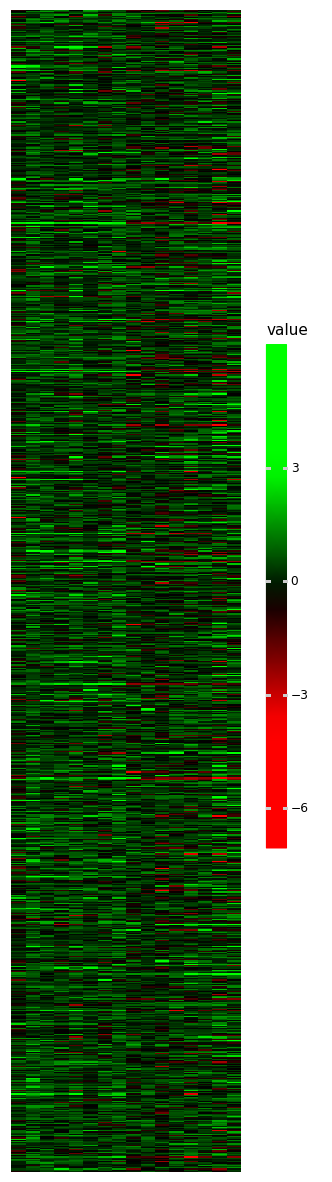

<ggplot: (8774571629806)>

In [7]:
theme_set(theme_void())
ggplot(df_melted, aes('sample','NAME', fill="value")) \
+ geom_tile() \
+ scale_fill_gradientn(colors=['#FF0000','#FF0000','#000000','#00FF00','#00FF00']) \
+ theme(figure_size=(3, 10), aspect_ratio=5, 
        legend_key_width=10, 
        legend_key_height=50)

In [8]:
# Separating out the features
x = df.loc[:, features].values

In [16]:
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
result = km.fit(x)

In [17]:
result.labels_

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [18]:
df["cluster"] = pd.Series(result.labels_)
cats = list(df.loc[df["cluster"] == 0]["NAME"]) + list(df.loc[df["cluster"] == 1]["NAME"])
df_melted["NAME"] = pd.Categorical(df_melted["NAME"], cats)

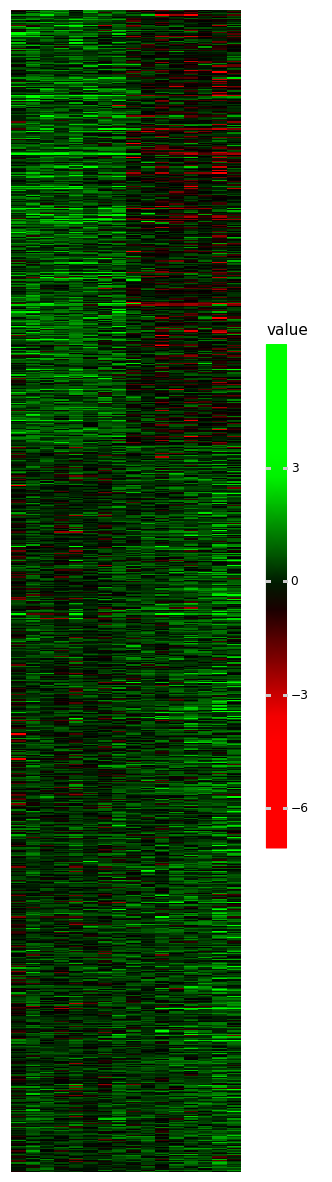

<ggplot: (8774571629788)>

In [14]:
theme_set(theme_void())
ggplot(df_melted, aes('sample','NAME', fill="value")) \
+ geom_tile() \
+ scale_fill_gradientn(colors=['#FF0000','#FF0000','#000000','#00FF00','#00FF00']) \
+ theme(figure_size=(3, 10), aspect_ratio=5, 
        legend_key_width=10, 
        legend_key_height=50)